In [17]:
import random, math

import matplotlib.pyplot as plt
import numpy as np

In [18]:
def Exposure(best_group,arm_cur_Er, group_to_arm, N_g_t, N_t) :
  pi_t=[]
  best_arm = 0
  sum_arm_group_mean_t_ucb=0
  arm_group_mean_t_ucb=np.zeros(len(N_t),dtype=float)
    #print("group_to_arm[best_group]", group_to_arm[best_group])
  #########################################################################################################

  for  i in group_to_arm[best_group]:
    #Arm estimated Reward
    arm_group_mean_t_ucb[i] = arm_cur_Er[i] + math.sqrt(2 * math.log(4*N_g_t[best_group]*len(group_to_arm[best_group]))/delta) * 1.0 / math.sqrt(N_t[i])
    if arm_group_mean_t_ucb[i]>=1:
      arm_group_mean_t_ucb[i]=1
    sum_arm_group_mean_t_ucb+=arm_group_mean_t_ucb[i]

  for  i in group_to_arm[best_group]:
    pi_t.append(arm_group_mean_t_ucb[i]/sum_arm_group_mean_t_ucb)

  data = list(zip(pi_t, group_to_arm[best_group]))

  t = sorted(data, key=lambda t: t[0])


  sum_prob=0
  ##################Pull best arm with Exposure#############################################
  select_random= np.round(random.random(),3)
  for i in range(0,len(group_to_arm[best_group]),1):
    sum_prob+=t[i][0]
    if(select_random<sum_prob):
      best_arm=t[i][1]
      break
  return pi_t, best_arm

In [19]:
def Exposure_full(best_group,arm_cur_Er, N_t, iteration) :
  pi_t=[]
  best_arm = 0
  sum_arm_group_mean_t_ucb=0
  arm_group_mean_t_ucb=np.zeros(len(N_t),dtype=float)
    #print("group_to_arm[best_group]", group_to_arm[best_group])
  #########################################################################################################

  for  i in best_group:
    #Arm estimated Reward
    arm_group_mean_t_ucb[i] = arm_cur_Er[i] + math.sqrt(2 * math.log(4*iteration*len(best_group))/delta) * 1.0 / math.sqrt(N_t[i])
    if arm_group_mean_t_ucb[i]>=1:
      arm_group_mean_t_ucb[i]=1
    sum_arm_group_mean_t_ucb+=arm_group_mean_t_ucb[i]

  for  i in best_group:
    pi_t.append(arm_group_mean_t_ucb[i]/sum_arm_group_mean_t_ucb)

  data = list(zip(pi_t, best_group))

  t = sorted(data, key=lambda t: t[0])


  sum_prob=0
  ##################Pull best arm with Exposure#############################################
  select_random= np.round(random.random(),3)
  for i in range(0,len(best_group),1):
    sum_prob+=t[i][0]
    if(select_random<sum_prob):
      best_arm=t[i][1]
      break
  return best_arm

In [20]:
def sample_from_distribution(arm_prob):
     reward_prob = random.random()
    # #print val,
     if reward_prob <= arm_prob:
         return 1.0 #reward value with probability
     else:
         return 0.0
    #return arm_prob

In [21]:
def unfair_set(num_arms, num_groups,iterations,N_g_t_l,beta_g):

  UFG_set=[]
  UFG_set_dist= np.zeros(num_groups,dtype=float)
  # for i in range(num_arms):
  #     arm_group_mean_t_ucb[arm_i_g] = arm_cur_Er[arm_i_g] + math.sqrt(2 * math.log(4*N_g_t[j]*len(group_to_arm[j]))/delta) * 1.0 / math.sqrt(N_t[arm_i_g])

  for j in range(num_groups):
      # print("group",j,"group pulls",N_g_t[j],"iterations ",iterations ,((beta_g[j]*(iterations-1))-N_g_t[j]),UFG_set )
      #Group estimated Reward
      #group_mean_t_ucb[i] =  group_cur_Er[j] + math.sqrt(alpha * math.log(t+1) * 1.0 / (1 * N_g_t[j]))
      if ((beta_g[j]*(iterations-1))-N_g_t_l[j]) > 0:
        UFG_set.append(j)
        UFG_set_dist[j]= ( (beta_g[j]*(iterations-1))-(N_g_t_l[j]))
  return UFG_set_dist,UFG_set

In [22]:
def Learn(num_groups, arm_cur_Er, group_to_arm, N_g_t, N_t):
  pi_j_t=[] #estimated group means
  best_group=0
  arm_group_mean_t_ucb= np.zeros(len(N_t),dtype=float)
  for j in range(num_groups):
    sum=0
    sum_arm_group_mean_t_ucb=0
    for  i in group_to_arm[j]:
    #Arm estimated Reward
      arm_group_mean_t_ucb[i] = arm_cur_Er[i] + math.sqrt(2 * math.log(4*N_g_t[j]*len(group_to_arm[j]))/delta) * 1.0 / math.sqrt(N_t[i])
      if arm_group_mean_t_ucb[i]>=1:
        arm_group_mean_t_ucb[i]=1
      sum_arm_group_mean_t_ucb+=arm_group_mean_t_ucb[i]


    for  i in group_to_arm[j]:

      sum+=((arm_group_mean_t_ucb[i]*arm_group_mean_t_ucb[i])/sum_arm_group_mean_t_ucb)

    pi_j_t.append(sum)     #Each group estimated reward

  best_group= np.argmax(pi_j_t,axis=0)
  #print("best_group in learn function is",best_group)
  return best_group

In [23]:
def GenerateGroups():
  arm_prob=[]

  group_to_arm=[[],[]]
  group_idx=[]

  arm_prob.append(.65)  ####Going to group 1 10 arms
  arm_prob.append(.6)  #####Going to group 2 5arms
  group_idx.append(0)
  group_idx.append(1)
  num_arm=1
  group_to_arm[0].append(num_arm-1)
  group_to_arm[1].append(num_arm)
  arr=[5]
  arr2= [10]
  #################Generating rewards of group 1##############################
  ii=0
  for i in range(num_arm+1,arr[0]+1):
        # 1th index arm  at group 2
        arm_prob.append(round(random.uniform(.6,.85),3))
        num_arm=num_arm+1
        # add  arm index at group 2
        group_to_arm[1].append(num_arm)

        group_idx.append(1)
        print("arm_prob. group idx",arm_prob[num_arm],group_to_arm)
  #arm set for group 2
  jj=0
  for jj in range(len(arr2)):
    if jj==0:

      for ii in range(num_arm+1,num_arm+arr2[jj]-len(group_to_arm[0])+1):
            # index arm  at group 1
            arm_prob.append(round(random.uniform(.6,.85),3))

            num_arm=num_arm+1
            # add  arm index at group 1
            group_to_arm[0].append(ii)

            group_idx.append(0)
            print("arm_prob. group idx",arm_prob[num_arm],group_to_arm)
            ii=ii+1

    else:
      jj=jj+1
      if(jj==len(arr2)):
        break;
      else:
        print("hi")
        #arms of group 2 incresed while keeping previous arms probabilities in arr2
        for ii in range(num_arm,num_arm+arr2[jj]-len(group_to_arm[0])):
            # index arm  at group 1
            ii=ii+1
            arm_prob.append(round(random.uniform(.6,.85),3))

            num_arm=num_arm+1
            # add  arm index at group 1
            group_to_arm[0].append(ii)

            group_idx.append(0)
  print("arm_prob. group idx",arm_prob,group_to_arm)
  return arm_prob,group_to_arm,group_idx

In [24]:
def find_max_group_size(arm_prob,group_to_arm,group_idx):
  a=len(group_to_arm[0])
  b=len(group_to_arm[1])
  print(a,b)
  print("group_to_arm",group_to_arm)
  print("arm_prob",arm_prob)
  print("group_idx",group_idx)
  ###########Input Param###############
  ############################################imortant calculation of variables##################################################
  # alpha= 2
  num_arms= len(group_to_arm[0])+len(group_to_arm[1])

  num_groups=2
  if(a>b):
    max_group_size=a
  else:
    max_group_size=b
  return max_group_size, num_arms, num_groups

In [25]:
# 61844 75071 82304 82383 83049 76985 65385 56520 63480 58101 59996 61497 54457 64192 54736]

In [26]:
def compute_optimal(arm_prob,group_to_arm,group_idx,num_groups):
  group_best_policy=[] #weighted reward

  pi_j_optimal=0   #group with max weighted reward

  optimal_policy_sum=[]

  optimal_policy=[[],[]] # arm prob/sum(prob) in group

  optimal_policy_reward=[[],[]] #arm prob in group

  for group1 in range(num_groups):
    sum11=0
    ER=0
    for arms in group_to_arm[group1]:
      sum11+=arm_prob[arms]
    for arms in group_to_arm[group1]:
      ER+=((arm_prob[arms]/sum11)*arm_prob[arms])
  #Calculated Optimal Policy among group g and for each arm
    for arms in group_to_arm[group1]:
      optimal_policy[group1].append(arm_prob[arms]/sum11)
      optimal_policy_reward[group1].append(arm_prob[arms])

    group_best_policy.append(ER)
    print("group_best_policy",group_best_policy)
    print("optimal_policy",optimal_policy)
  max=0
  group_best_policy_ER=0 # value of group with max weighted reward

  #####group_best_policy_ER ,pi_j_optimal best policy and reward among groups
  for group1 in range(num_groups):
    if(max<= group_best_policy[group1]):
      group_best_policy_ER = group_best_policy[group1]
      pi_j_optimal = group1
      max = group_best_policy_ER
  return group_best_policy, group_best_policy_ER, pi_j_optimal, optimal_policy

In [27]:
def initialpulls(num_groups,arm_prob, max_group_size, group_to_arm, delta, group_idx, num_arms):
  iterations=0
  N_t=np.zeros(num_arms,dtype=int)# number of times arm pulled
  arm_cur_Er_g = [0]*num_arms
  group_cur_Er=[0]*num_groups
  N_g_t=np.zeros(num_groups,dtype=int)   #number of times group pulled
  arm_group_mean_t_ucb= np.zeros(num_arms,dtype=float)
  total_group_reward=[0]*num_groups
  total_reward = 0



  for j in range(num_groups):
          for i in range(max_group_size):
                if( N_g_t[j] < len(group_to_arm[j])):
                    # print(group_to_arm[j][N_g_t[j]])
                    arm_i_g= group_to_arm[j][N_g_t[j]]
                    # print("print",arm_i_g,N_t[arm_i_g])
                    if(N_t[arm_i_g]==0):
                        new_reward = sample_from_distribution(arm_prob[arm_i_g])
                        # print(new_reward)
                        arm_cur_Er_g[arm_i_g] = (N_t[arm_i_g] * arm_cur_Er_g[arm_i_g]  + new_reward) * 1.0 / (N_t[arm_i_g] + 1)

                        iterations=iterations+1
                        N_t[arm_i_g] = N_t[arm_i_g]+1
                        N_g_t[j]=N_g_t[j]+1

                        # arm_mean_t_ucb[arm_i_g] = arm_cur_Er[arm_i_g] + math.sqrt(2 * math.log(4*N_g_t[j]len(group_to_arm[j]))/delta) * 1.0 / math.sqrt(N_t[arm_i_g])
                        arm_group_mean_t_ucb[arm_i_g] = arm_cur_Er_g[arm_i_g] + math.sqrt(2 * math.log(4*N_g_t[j]*len(group_to_arm[j]))/delta) * 1.0 / math.sqrt(N_t[arm_i_g])
                        if(arm_group_mean_t_ucb[arm_i_g] >= 1):
                          arm_group_mean_t_ucb[arm_i_g] = 1

                        total_reward+=new_reward
                        total_group_reward[group_idx[arm_i_g]]+=new_reward

                else:
                      # print('star')
                      arm_index_g = random.randint(0, len(group_to_arm[j])-1)
                      arm_i_g=group_to_arm[j][arm_index_g]
                      new_reward = sample_from_distribution(arm_prob[arm_i_g])
                      # print(new_reward)
                      arm_cur_Er_g[arm_i_g] = (N_t[arm_i_g] * arm_cur_Er_g[arm_i_g]  + new_reward) * 1.0 / (N_t[arm_i_g] + 1)

                      iterations=iterations+1
                      N_t[arm_i_g] = N_t[arm_i_g]+1
                      N_g_t[j]=N_g_t[j]+1

                      # arm_mean_t_ucb[arm_i_g] = arm_cur_Er[arm_i_g] + math.sqrt(2 * math.log(4*N_g_t[j]len(group_to_arm[j]))/delta) * 1.0 / math.sqrt(N_t[arm_i_g])
                      arm_group_mean_t_ucb[arm_i_g] = arm_cur_Er_g[arm_i_g] + math.sqrt(2 * math.log(4*N_g_t[j]*len(group_to_arm[j]))/delta) * 1.0 / math.sqrt(N_t[arm_i_g])
                      if(arm_group_mean_t_ucb[arm_i_g] >= 1):
                          arm_group_mean_t_ucb[arm_i_g] = 1

                      total_reward+=new_reward
                      #total_group_reward[group_idx[arm_i_g]]+=new_reward
  return iterations, total_reward, arm_cur_Er_g, N_t, N_g_t

In [28]:
def save_file(N_g_t_ouralgo, N_g_t_UCB, N_g_t_EF, N_g_t_GF, N_t_ouralgo, N_t_UCB, N_t_EF, N_t_GF,i):
    filename =i
    with open(r'N_g_t_ouralgo_list_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in N_g_t_ouralgo:
            
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
            
    
   
    
    with open(r'N_g_t_UCB_list_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in N_g_t_UCB:
           
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
           
    
   
    
    
    with open(r'N_g_t_EF_list_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in  N_g_t_EF:
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
           
    
  
    with open(r'N_g_t_GF_list_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in N_g_t_GF:
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
            
    
   
    
    with open(r'N_t_ouralgo_list_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in N_t_ouralgo:
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
            
    
    
    
    with open(r'N_t_UCB_list_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in N_t_UCB:
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
            
    
    
    
    with open(r'N_t_EF_list_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in N_t_EF:
            
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
           
    
    
    
    with open(r'N_t_GF_list_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in N_t_GF:
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
        
    
   


In [29]:


def save_file2(list_total_reward_ouralgo,list_total_reward_UCB,list_total_reward_EF,list_total_reward_GF,list_total_regret_ouralgo,list_exposure_fair_group1,list_exposure_fair_group2,list_N_g_t_ouralgo,i):
    filename =i
    with open(r'list_total_reward_ouralgo_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in list_total_reward_ouralgo:
            
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
            
    
   
    
    with open(r'list_total_reward_UCB_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in list_total_reward_UCB:
           
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
           
    
   
    
    
    with open(r'list_total_reward_EF_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in  list_total_reward_EF:
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
           
    
  
    with open(r'list_total_reward_GF_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in list_total_reward_GF:
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
            
    
   
    
    with open(r'list_total_regret_ouralgo_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in list_total_regret_ouralgo:
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
            
    
    
    
    with open(r'list_exposure_fair_group1_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in list_exposure_fair_group1:
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
            
    
    
    
    with open(r'list_exposure_fair_group2_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in list_exposure_fair_group2:
            
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
           
    
    
    
    with open(r'list_N_g_t_ouralgo_'+str(filename)+'.txt', 'a') as fp:
        fp.write("[")
        for each in list_N_g_t_ouralgo:
            
                # write each item on a new line
            fp.write("%s ," % each)
        fp.write("],\n")
        
    
    

# OUR ALGO

In [30]:
def UCB(arm_set, arm_cur_Er, N_t,iteration):

  pi_t=[]
  best_arm = 0
  arm_group_mean_t_ucb = np.zeros(len(N_t),dtype=float)


  for  i in arm_set:
    #Arm estimated Reward
    arm_group_mean_t_ucb[i] = arm_cur_Er[i] + math.sqrt(2 * math.log(4*iteration*len(arm_set))/delta) * 1.0 / math.sqrt(N_t[i])
    if arm_group_mean_t_ucb[i]>=1:
      arm_group_mean_t_ucb[i]=1
  best_arm= np.argmax(arm_group_mean_t_ucb)
  return best_arm


In [31]:
def OUR_ALGO(num_arms, num_groups, max_group_size,beta_g, arm_cur_Er, group_to_arm, N_g_t, N_t, total_time,group_best_policy,group_best_policy_ER,pi_j_optimal,optimal_policy,arm_prob,group_idx):
    print("First line of main loop, num_arms, num_groups, beta_g, total_time",num_arms, num_groups, beta_g, total_time)
    list_total_reward_ouralgo=[]
    list_total_reward_EF=[]
    list_total_reward_GF=[]
    list_total_reward_UCB=[]
    list_total_regret_ouralgo = []
    list_exposure_fair_group1 = []
    list_exposure_fair_group2 = []
    list_group_fair_group1 = []
    list_group_fair_group2 = []
    list_N_g_t_ouralgo = []
    N_t_ouralgo = N_t.copy()
    N_t_EF = N_t.copy()
    N_t_GF = N_t.copy()
    N_t_UCB = N_t.copy()
    N_g_t_ouralgo = N_g_t.copy()
    N_g_t_EF = N_g_t.copy()
    N_g_t_GF = N_g_t.copy()
    N_g_t_UCB = N_g_t.copy()
    time=[]
    total_reward_ouralgo=0
    total_reward_EF=0
    total_reward_GF=0
    total_reward_UCB=0
    total_regret_ouralgo = 0
    exposure_fair = [0,0]
    group_fair_group1 = 0
    group_fair_group2 = 0
    arm_cur_Er_ouralgo = arm_cur_Er.copy()
    arm_cur_Er_EF = arm_cur_Er.copy()
    arm_cur_Er_GF = arm_cur_Er.copy()
    arm_cur_Er_UCB = arm_cur_Er.copy()
    full_set=[]
    exposure_fair = [0,0]
    Ropt_g = [0,0]

    for j in range(num_groups):
      for arm in group_to_arm[j]:
        full_set.append(arm)

    print("full set is", full_set)
    Ropt_gopt=group_best_policy_ER
    for j in range(num_groups):
      Ropt_g[j]=group_best_policy[j]
    for iterations in range(max_group_size*num_groups,total_time):

        optreward = 0
        sub_opt = 0
        for j in range(num_groups):
          if(j != pi_j_optimal):
            sub_opt+=math.floor(beta_g[j]*iterations)
            optreward += math.floor(beta_g[j]*iterations)*Ropt_g[j]
        optreward += (iterations-sub_opt)*Ropt_gopt
        UFG_arm_mean_t_ucb= np.zeros(num_arms,dtype=float)
        iterations= iterations + 1
        UFG_set_dist,UFG_set =unfair_set(num_arms, num_groups,iterations,N_g_t_ouralgo,beta_g)
        #1####################################################################################################
    ##############################If group pulled a##################################################################################################################################
        if (len(UFG_set)!=0):

            # counter+=1
            #group a pulled from UFG
            best_group= np.argmax(UFG_set_dist,axis=0)
     #########2###############################################################################################

            pi_t, best_arm= Exposure(best_group,arm_cur_Er_ouralgo, group_to_arm, N_g_t_ouralgo, N_t_ouralgo)

      #########2###############################################################################################
        else:

            best_group=Learn(num_groups, arm_cur_Er_ouralgo, group_to_arm, N_g_t_ouralgo, N_t_ouralgo )

            pi_t, best_arm= Exposure(best_group,arm_cur_Er_ouralgo, group_to_arm, N_g_t_ouralgo, N_t_ouralgo)


            ###########################################################################################
        tt=0
        temp = 0
        for  k in range(len(group_to_arm[best_group])):
          temp+=abs(optimal_policy[best_group][tt]-pi_t[tt])
          tt=tt+1
        exposure_fair[best_group] = temp
        N_t_ouralgo[best_arm] += 1
        N_g_t_ouralgo[best_group] += 1
        new_reward = sample_from_distribution(arm_prob[best_arm])
        total_reward_ouralgo += new_reward
        total_regret_ouralgo = optreward - total_reward_ouralgo
        arm_cur_Er_ouralgo[best_arm] = (N_t_ouralgo[best_arm] * arm_cur_Er_ouralgo[best_arm]  + new_reward) * 1.0 / (N_t_ouralgo[best_arm] + 1)
        #print("iteration = ", iterations)
        #print("best arm of our algo", best_arm)
        #print("N_t of our algo", N_t_ouralgo)

#############################UCB#####################################################################################################

        best_arm = UCB(full_set, arm_cur_Er_UCB, N_t_UCB, iterations)
        N_t_UCB[best_arm] += 1
        N_g_t_UCB[group_idx[best_arm]] += 1
        new_reward = sample_from_distribution(arm_prob[best_arm])
        total_reward_UCB += new_reward
        arm_cur_Er_UCB[best_arm] = (N_t_UCB[best_arm] * arm_cur_Er_UCB[best_arm]  + new_reward) * 1.0 / (N_t_UCB[best_arm] + 1)
        #print("best arm of UCB", best_arm)
        #print("N_t of UCB", N_t_UCB)
##################################################Exposure Fairness################################################################

        best_arm= Exposure_full(full_set,arm_cur_Er_EF, N_t_ouralgo, iterations)
        N_t_EF[best_arm] += 1
        N_g_t_EF[group_idx[best_arm]] += 1
        new_reward = sample_from_distribution(arm_prob[best_arm])
        total_reward_EF += new_reward
        arm_cur_Er_EF[best_arm] = (N_t_EF[best_arm] * arm_cur_Er_EF[best_arm]  + new_reward) * 1.0 / (N_t_EF[best_arm] + 1)
        #print("best arm of EF", best_arm)
        #print("N_t of EF", N_t_EF)

#########################################Group Fairness###############################################################################
        UFG_arm_mean_t_ucb_gf= np.zeros(num_arms,dtype=float)
        UFG_set_dist_GF,UFG_set_GF =unfair_set(num_arms, num_groups,iterations,N_g_t_GF,beta_g)
        if (len(UFG_set_GF)!=0):
            best_group= np.argmax(UFG_set_dist_GF,axis=0)
            best_arm= UCB(group_to_arm[best_group],arm_cur_Er_GF, N_t_GF, iterations)
        else:
            best_arm= UCB(full_set, arm_cur_Er_GF, N_t_GF, iterations)
            best_group = group_idx[best_arm]
        N_t_GF[best_arm] += 1
        N_g_t_GF[best_group] += 1
        new_reward = sample_from_distribution(arm_prob[best_arm])
        total_reward_GF += new_reward
        arm_cur_Er_GF[best_arm] = (N_t_GF[best_arm] * arm_cur_Er_GF[best_arm]  + new_reward) * 1.0 / (N_t_GF[best_arm] + 1)
        #print("best arm of GF", best_arm)
        #print("N_t of GF", N_t_GF)

        if(iterations%1000 == 0):
          list_total_reward_ouralgo.append(total_reward_ouralgo)
          list_total_reward_UCB.append(total_reward_UCB)
          list_total_reward_EF.append(total_reward_EF)
          list_total_reward_GF.append(total_reward_GF)
          list_total_regret_ouralgo.append(total_regret_ouralgo)
          list_exposure_fair_group1.append(exposure_fair[0])
          list_exposure_fair_group2.append(exposure_fair[1])
          list_N_g_t_ouralgo.append(N_g_t_ouralgo.copy())
          # print("iteration",iterations)
          # regretlist.append(optreward - total_reward)
          time.append(iterations)
        #print(N_t_ouralgo )
        #print(N_t_EF )
        #print(N_t_GF )
        #print(N_t_UCB )
    return N_g_t_ouralgo, N_g_t_UCB, N_g_t_EF, N_g_t_GF, N_t_ouralgo, N_t_UCB, N_t_EF, N_t_GF,time,list_total_reward_ouralgo,list_total_reward_UCB,list_total_reward_EF,list_total_reward_GF,list_total_regret_ouralgo,list_exposure_fair_group1,list_exposure_fair_group2, list_N_g_t_ouralgo

In [32]:
a=0
total_time=10000000
delta=0.01
beta_g1 = [0.2,0.2]
beta_g2 = [0.3,0.3]
beta_g3 = [0.4,0.4]
for i in range(10):
    filename=0  
    print("iteration",a)
    a=a+1
    arm_prob, group_to_arm, group_idx = GenerateGroups()
    max_group_size, num_arms, num_groups = find_max_group_size(arm_prob, group_to_arm, group_idx)
    group_best_policy, group_best_policy_ER, pi_j_optimal, optimal_policy = compute_optimal(arm_prob,group_to_arm,group_idx,num_groups)
    iterations, total_reward, arm_cur_Er_g,N_t,N_g_t = initialpulls(num_groups,arm_prob,max_group_size,group_to_arm,delta,group_idx,num_arms)
    N_g_t_ouralgo, N_g_t_UCB, N_g_t_EF, N_g_t_GF, N_t_ouralgo, N_t_UCB, N_t_EF, N_t_GF,time,list_total_reward_ouralgo,list_total_reward_UCB,list_total_reward_EF,list_total_reward_GF,list_total_regret_ouralgo1,list_exposure_fair_group1,list_exposure_fair_group2,list_N_g_t_ouralgo=OUR_ALGO(num_arms, num_groups, max_group_size,beta_g1, arm_cur_Er_g, group_to_arm, N_g_t, N_t, total_time,group_best_policy,group_best_policy_ER,pi_j_optimal,optimal_policy,arm_prob,group_idx)
    
    save_file(N_g_t_ouralgo, N_g_t_UCB, N_g_t_EF, N_g_t_GF, N_t_ouralgo, N_t_UCB, N_t_EF, N_t_GF,0)
    save_file2(list_total_reward_ouralgo,list_total_reward_UCB,list_total_reward_EF,list_total_reward_GF,list_total_regret_ouralgo1,list_exposure_fair_group1,list_exposure_fair_group2,list_N_g_t_ouralgo,0)
    N_g_t_ouralgo, N_g_t_UCB, N_g_t_EF, N_g_t_GF, N_t_ouralgo, N_t_UCB, N_t_EF, N_t_GF,time,list_total_reward_ouralgo,list_total_reward_UCB,list_total_reward_EF,list_total_reward_GF,list_total_regret_ouralgo2,list_exposure_fair_group1,list_exposure_fair_group2,list_N_g_t_ouralgo=OUR_ALGO(num_arms, num_groups, max_group_size,beta_g2, arm_cur_Er_g, group_to_arm, N_g_t, N_t, total_time,group_best_policy,group_best_policy_ER,pi_j_optimal,optimal_policy,arm_prob,group_idx)
   
    save_file(N_g_t_ouralgo, N_g_t_UCB, N_g_t_EF, N_g_t_GF, N_t_ouralgo, N_t_UCB, N_t_EF, N_t_GF,1)
    save_file2(list_total_reward_ouralgo,list_total_reward_UCB,list_total_reward_EF,list_total_reward_GF,list_total_regret_ouralgo2,list_exposure_fair_group1,list_exposure_fair_group2,list_N_g_t_ouralgo,1)

    N_g_t_ouralgo, N_g_t_UCB, N_g_t_EF, N_g_t_GF, N_t_ouralgo, N_t_UCB, N_t_EF, N_t_GF,time,list_total_reward_ouralgo,list_total_reward_UCB,list_total_reward_EF,list_total_reward_GF,list_total_regret_ouralgo,list_exposure_fair_group1,list_exposure_fair_group2,list_N_g_t_ouralgo=OUR_ALGO(num_arms, num_groups, max_group_size,beta_g3, arm_cur_Er_g, group_to_arm, N_g_t, N_t, total_time,group_best_policy,group_best_policy_ER,pi_j_optimal,optimal_policy,arm_prob,group_idx)
    save_file(N_g_t_ouralgo, N_g_t_UCB, N_g_t_EF, N_g_t_GF, N_t_ouralgo, N_t_UCB, N_t_EF, N_t_GF,2)
    save_file2(list_total_reward_ouralgo,list_total_reward_UCB,list_total_reward_EF,list_total_reward_GF,list_total_regret_ouralgo,list_exposure_fair_group1,list_exposure_fair_group2,list_N_g_t_ouralgo,2)
    # print("iteration",iterations)
    print("#############################################\n")
    # print(list_total_reward_ouralgo,"\n",list_total_reward_UCB,"\n",list_total_reward_EF,"\n",list_total_reward_GF,"\n",list_total_regret_ouralgo1,"\n",list_exposure_fair_group1,"\n",list_exposure_fair_group2)

iteration 0
arm_prob. group idx 0.675 [[0], [1, 2]]
arm_prob. group idx 0.675 [[0], [1, 2, 3]]
arm_prob. group idx 0.655 [[0], [1, 2, 3, 4]]
arm_prob. group idx 0.798 [[0], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.735 [[0, 6], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.642 [[0, 6, 7], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.691 [[0, 6, 7, 8], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.847 [[0, 6, 7, 8, 9], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.795 [[0, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.703 [[0, 6, 7, 8, 9, 10, 11], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.649 [[0, 6, 7, 8, 9, 10, 11, 12], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.683 [[0, 6, 7, 8, 9, 10, 11, 12, 13], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.612 [[0, 6, 7, 8, 9, 10, 11, 12, 13, 14], [1, 2, 3, 4, 5]]
arm_prob. group idx [0.65, 0.6, 0.675, 0.675, 0.655, 0.798, 0.735, 0.642, 0.691, 0.847, 0.795, 0.703, 0.649, 0.683, 0.612] [[0, 6, 7, 8, 9, 10, 11, 12, 13, 14], [1, 2, 3, 4, 5]]
10 5
group_to_arm [[0, 6, 7, 8, 9, 10, 11

First line of main loop, num_arms, num_groups, beta_g, total_time 15 2 [0.3, 0.3] 10000000
full set is [0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5]
First line of main loop, num_arms, num_groups, beta_g, total_time 15 2 [0.4, 0.4] 10000000
full set is [0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5]
#############################################

iteration 4
arm_prob. group idx 0.693 [[0], [1, 2]]
arm_prob. group idx 0.716 [[0], [1, 2, 3]]
arm_prob. group idx 0.676 [[0], [1, 2, 3, 4]]
arm_prob. group idx 0.713 [[0], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.762 [[0, 6], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.755 [[0, 6, 7], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.795 [[0, 6, 7, 8], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.835 [[0, 6, 7, 8, 9], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.761 [[0, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.675 [[0, 6, 7, 8, 9, 10, 11], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.822 [[0, 6, 7, 8, 9, 10, 11, 12], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.

First line of main loop, num_arms, num_groups, beta_g, total_time 15 2 [0.3, 0.3] 10000000
full set is [0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5]
First line of main loop, num_arms, num_groups, beta_g, total_time 15 2 [0.4, 0.4] 10000000
full set is [0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5]
#############################################

iteration 8
arm_prob. group idx 0.778 [[0], [1, 2]]
arm_prob. group idx 0.664 [[0], [1, 2, 3]]
arm_prob. group idx 0.618 [[0], [1, 2, 3, 4]]
arm_prob. group idx 0.819 [[0], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.691 [[0, 6], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.68 [[0, 6, 7], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.838 [[0, 6, 7, 8], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.842 [[0, 6, 7, 8, 9], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.614 [[0, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.656 [[0, 6, 7, 8, 9, 10, 11], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.603 [[0, 6, 7, 8, 9, 10, 11, 12], [1, 2, 3, 4, 5]]
arm_prob. group idx 0.6

In [33]:
# beta_g = [0.4,0.4]

C:\Users\USER\AppData\Local\Temp\ipykernel_15984\3432368478.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


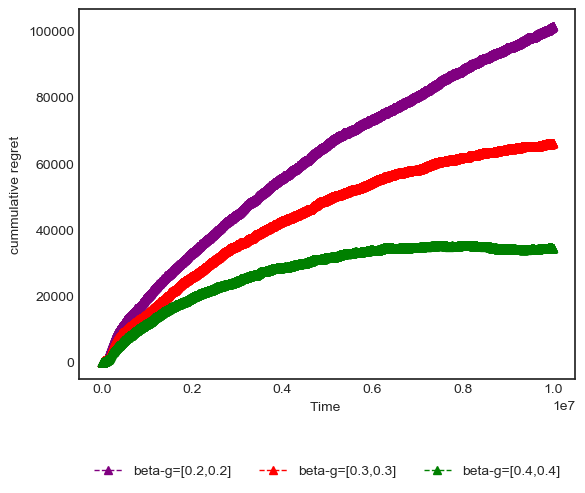

In [34]:
#############################################Plotting Regret of our algorithm with different Beta_g's############################
import numpy as np
import matplotlib.pyplot as plt
# from sctimipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(time,list_total_regret_ouralgo1,label='beta-g=[0.2,0.2]',color='purple',marker='^',linestyle='--',linewidth=1)
ax.plot(time,list_total_regret_ouralgo2,label='beta-g=[0.3,0.3]',color='red',marker='^',linestyle='--',linewidth=1)
ax.plot(time,list_total_regret_ouralgo,label='beta-g=[0.4,0.4]',color='green',marker='^',linestyle='--',linewidth=1)

plt.title('')
ax.set_xlabel('Time ')
ax.set_ylabel('cummulative regret')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show()
fig.savefig('a2.png')
#################################################################################


C:\Users\USER\AppData\Local\Temp\ipykernel_15984\2522255061.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


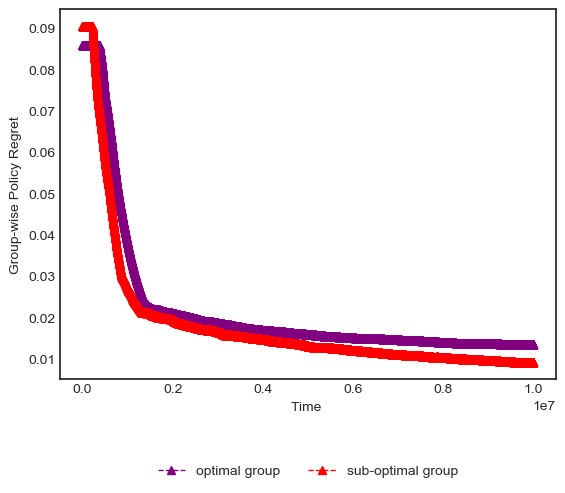

In [35]:
#######################################Plotting Exposure Fair Regret of our algorithm for two groups######################
import numpy as np
import matplotlib.pyplot as plt
# from sctimipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(time,list_exposure_fair_group1,label='optimal group',color='purple',marker='^',linestyle='--',linewidth=1)
ax.plot(time,list_exposure_fair_group2,label='sub-optimal group',color='red',marker='^',linestyle='--',linewidth=1)

plt.title('')
ax.set_xlabel('Time ')
ax.set_ylabel('Group-wise Policy Regret')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show()
fig.savefig('a2.png')

In [36]:
#######################################Plotting Group Fair Regret of our algorithm for two groups######################
import numpy as np
import matplotlib.pyplot as plt
# from sctimipy.signal import savgol_filter
group1=[]
group2=[]
tt=0
for i in time:
  group1.append(list_N_g_t_ouralgo[tt][0] - beta_g[0]*i)
  group2.append(list_N_g_t_ouralgo[tt][1] - beta_g[1]*i)
  tt=tt+1
print(list_N_g_t_ouralgo)
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(time,group1,label='optimal group',color='purple',marker='^',linestyle='--',linewidth=1)
ax.plot(time,group2,label='sub-optimal group',color='red',marker='^',linestyle='--',linewidth=1)

plt.title('')
ax.set_xlabel('Time ')
ax.set_ylabel('Group Fair Regret')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show()
fig.savefig('a2.png')

NameError: name 'beta_g' is not defined

In [ ]:
print(list_N_g_t_ouralgo)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from sctimipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(time,list_total_reward_ouralgo,label='BF-UCB',color='purple',marker='^',linestyle='--',linewidth=1)
ax.plot(time,list_total_reward_UCB,label='UCB',color='red',marker='^',linestyle='--',linewidth=1)
ax.plot(time,list_total_reward_EF,label='EF',color='green',marker='^',linestyle='--',linewidth=1)
ax.plot(time,list_total_reward_GF,label='GF',color='yellow',marker='^',linestyle='--',linewidth=1)

plt.title('')
ax.set_xlabel('Time ')
ax.set_ylabel('cummulative reward')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show()
fig.savefig('a2.png')
#################################################################################
print("Arm_prob",len(arm_prob),arm_prob)
print("group_to arm",group_to_arm)


In [ ]:
  # [351815, 648185]    [618183, 381817]       [354577, 645423],       [256646, 743354]
import pandas as pd

plotdata = pd.DataFrame({
  "BF-UCB":N_g_t_ouralgo,
  "EF": N_g_t_EF,
  "GF":N_g_t_GF,
  "UCB": N_g_t_UCB },
  index=["Group 0","Group 1"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("within Group exposure")

plt.xlabel("Groups Indices")

plt.ylabel("Number of Pulls")

In [ ]:
print("All N_t's")
print("our algo", N_t_ouralgo)
print("UCB", N_t_UCB)
print("GF", N_t_GF)
print("EF", N_t_EF)

In [ ]:
group_to_arm=[[0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
params = {'legend.fontsize': 'medium',
           'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'40',
         'axes.linewidth':2,
          'font.weight': '500',
          'figure.titlesize':'medium',
         'font.size': 33,
         'ytick.labelsize':'40'}
plt.rcParams.update(params)


c=np.array(N_t_EF)
d=np.array(N_t_GF)
b=np.array(N_t_UCB)
a=np.array(N_t_ouralgo)

         
         
a_mean = np.mean(a,axis=0)
b_mean = np.mean(b,axis=0)
c_mean = np.mean(c,axis=0)
d_mean = np.mean(d,axis=0)
# c_mean = np.mean(c)
# print(a_mean)
# print(b_mean)

# Calculate the standard deviation
a_std = np.std(a,axis=0)
b_std = np.std(b,axis=0)
c_std = np.std(c,axis=0)
d_std = np.std(d,axis=0)

# print(a_std)
# print(b_std)

# Calculate the standard deviation

# a_std = np.std(a,axis=0)
# b_std = np.std(b,axis=0)

# print(a_std)
# print(b_std)

labels = ['Mean', 'Std Dev']
values = [a_mean, a_std]


groups = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
x_pos = np.arange(len(groups))

CTEsa = a_mean[group_to_arm[1]]
errora = a_std[group_to_arm[1]]

CTEsb = b_mean[group_to_arm[1]]
errorb = b_std[group_to_arm[1]]

CTEsc = c_mean[group_to_arm[1]]
errorc = c_std[group_to_arm[1]]

CTEsd = d_mean[group_to_arm[1]]
errord = d_std[group_to_arm[1]]

# Build the plot
# fig = plt.figure(figsize=(100,10))

fig, ax = plt.subplots(figsize=(20,10))


ax.bar(x_pos+ 0 ,CTEsb, 0.2,yerr=errorb, align='center', ecolor='black', capsize=2, label = 'EF')
ax.bar(x_pos+ 0.2, CTEsc, 0.2,yerr=errorc, align='center', ecolor='black', capsize=2,label = 'GF')
ax.bar(x_pos+ 0.4 ,CTEsd, 0.2,yerr=errord, align='center', ecolor='black', capsize=2, label = 'UCB')
ax.bar(x_pos- 0.2, CTEsa, 0.2,yerr=errora, align='center',  ecolor='black', capsize=2,label = 'BF-UCB')
ax.set_ylabel('Number of Pulls')
ax.set_xlabel('Indices of Arms within sub-optimal Group')
ax.set_xticks(x_pos, groups)
ax.set_xticklabels(groups)
ax.legend(loc='upper right')
ax.set_title('')





# plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()


# Save the figure and show
plt.tight_layout()
plt.savefig('6.png')
plt.show()